# xvector_jtubespeechモデルの主成分解析
512次元の各話者の平均x-vectorを主成分解析により2次元に圧縮  
これによりx-vectorが話者の特徴を捉えられているのか（似た声の人は値が似通る）を確認  

---  

jvsコーパスでx-vectorの主成分解析を行っていた論文 【[pdf](http://www.me.cs.scitec.kobe-u.ac.jp/~takigu/pdf/2022/yoshi-1-3P-15#:~:text=x%2Dvector%20%E3%81%AF%20%E8%A9%B1%E8%80%85,%E3%81%A6%E3%81%84%E3%82%8B%E3%81%A8%E8%80%83%E3%81%88%E3%82%89%E3%82%8C%E3%82%8B%EF%BC%8E)】  
主成分解析の仕方 【[サイト](https://corvus-window.com/python_pca/)】  

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### データ読み込み

In [2]:
vecfile_path = "./data/NL_Xvector.csv"
idfile_path = "./data/id_and_NL.csv"
gender_path = "/autofs/diamond2/share/corpus/JVS/jvs_ver1/gender_f0range.txt"
duration_path = "/autofs/diamond2/share/corpus/JVS/jvs_ver1/duration_info.txt"


In [3]:
vector_df = pd.read_csv(vecfile_path, header=None)
id_df = pd.read_csv(idfile_path, header=None, names=['id', 'text'])

id = id_df['id'].tolist()
text = id_df['text'].tolist()
vector = vector_df.iloc[:79,1:].values.tolist()
df = pd.DataFrame([id,text,vector],index=['id', 'text', 'vector']).T

gender_df = pd.read_table(gender_path, sep=' ')

duration_df = pd.read_table(duration_path, sep=' ')

In [4]:
gender_df['speaker'] = range(1, len(gender_df) + 1)
gender_df = gender_df.rename(columns={'speaker': 'id'})
gender_df = gender_df.rename(columns={'Male_or_Female': 'gender'})


In [5]:
duration_df['speaker'] = range(1, len(gender_df) + 1)
duration_df = duration_df.rename(columns={'speaker': 'id'})

In [6]:
df = pd.merge(df, gender_df, on='id', how='inner')
df = pd.merge(df, duration_df, on='id', how='inner')

In [7]:
df

,id,text,vector,gender,minf0[Hz],maxf0[Hz],parallel100[min],nonpara30[min],whisper10[min],falset10[min]
0,10,おとなしく幼さを感じる女子中学生,"[72.2918, 32.150536, -26.703049, 71.032425, 9....",F,125,480,12.95,2.58,1.20,1.17
1,11,中性的な声の青年,"[48.16807, 26.864574, 3.1174917, 68.31655, -3....",M,70,310,13.38,2.53,1.32,1.07
2,14,少年ぽさを感じる女の子,"[50.546425, 28.192448, 13.907489, 68.681786, 2...",F,130,470,12.76,2.60,1.14,1.14
3,15,20歳程度のお姉さん,"[60.4033, 25.462183, -43.30236, 79.62085, 10.2...",F,130,435,11.25,2.20,0.99,1.06
4,18,ゆっくり間を開けて話す女性,"[64.49518, 46.546143, -20.867186, 80.923996, -...",F,115,380,15.56,3.67,1.69,1.53
...,...,...,...,...,...,...,...,...,...,...
74,92,早口で話すかすれた声のおばさん,"[66.19808, 45.58355, 16.497059, 78.61091, 13.8...",F,110,380,12.90,2.72,1.32,1.13
75,95,20～30歳ぐらいの女性,"[60.73048, 22.953293, -24.905949, 87.88066, 17...",F,125,370,12.84,2.71,1.24,1.14
76,96,高く細い声の女の人,"[44.67697, 8.243559, 14.198465, 88.59879, 15.3...",F,135,410,12.80,2.77,1.22,1.15
77,97,ふわふわした高い声の男性,"[54.20453, 18.050787, 7.1338434, 82.92252, 5.5...",M,70,305,13.14,2.73,1.44,1.09


### データの標準化

In [8]:
def standardize_nested_list(nested_list):
    # 2重のリストをNumPy配列に変換
    arr = np.array(nested_list)

    # 平均と標準偏差を計算（各要素に対して）
    mean = np.mean(arr)
    std = np.std(arr)

    # 標準化した配列を計算（各要素に対して）
    standardized_arr = (arr - mean) / std

    # 標準化された配列を2重のリストに変換して返す
    standardized_nested_list = standardized_arr.tolist()
    return standardized_nested_list


In [9]:
vectors = standardize_nested_list(vector)
dfs = pd.DataFrame(vectors)


### 主成分分析

In [10]:
pca = PCA()
pca.fit(dfs)
pca_row = pca.transform(dfs)


       PC1       PC2       PC3       PC4      PC5       PC6      PC7  \
0  0.28782  0.144735  0.132406  0.081967  0.07207  0.058974  0.03426   

        PC8       PC9      PC10  ...      PC70      PC71     PC72      PC73  \
0  0.027567  0.025334  0.017631  ...  0.000067  0.000064  0.00006  0.000055   

      PC74      PC75      PC76          PC77          PC78          PC79  
0  0.00005  0.000044  0.000042  4.820599e-31  1.606698e-33  1.329059e-33  

[1 rows x 79 columns]


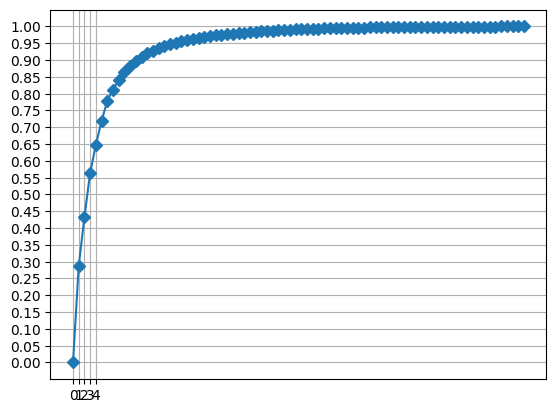

In [11]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(dfs.T.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(5))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()


           0         1         2         3         4         5         6    \
PC1   0.005691 -0.047628  0.033637 -0.002234 -0.018233 -0.038047  0.027767   
PC2  -0.027739  0.010820  0.068476 -0.003948 -0.018364  0.042102  0.040724   
PC3  -0.049806 -0.052210 -0.019743  0.057977 -0.002888 -0.010843  0.047600   
PC4  -0.044899  0.071106  0.065370  0.013017 -0.060583  0.052017 -0.060222   
PC5  -0.016680  0.054740 -0.068286 -0.016616 -0.016862  0.013574  0.077423   
...        ...       ...       ...       ...       ...       ...       ...   
PC75 -0.009270 -0.013152 -0.020490  0.033974 -0.035315  0.014453 -0.073106   
PC76 -0.020085  0.017953 -0.014373  0.016028 -0.053085 -0.004246  0.005770   
PC77  0.077602  0.018782  0.004822 -0.069778  0.041008 -0.010962 -0.013743   
PC78  0.023519  0.035411  0.147466 -0.045554 -0.099663 -0.040804  0.208839   
PC79 -0.037585  0.013239 -0.011906  0.063971  0.047849  0.054902 -0.133921   

           7         8         9    ...       502       503    

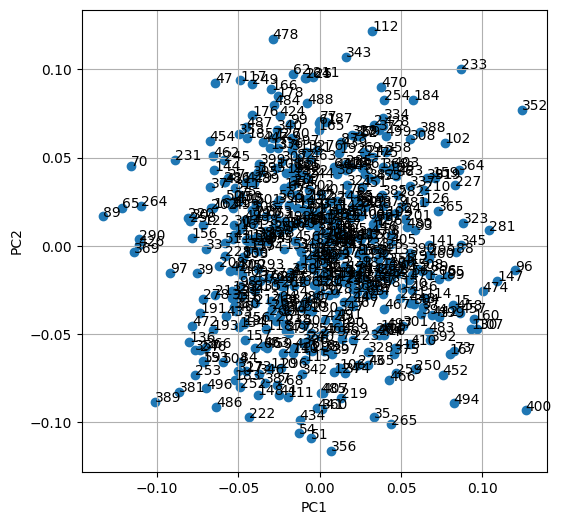

In [12]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns = pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=dfs.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


---

### PCA -要素分析

In [13]:
F_mean = df[df["gender"]=="F"]["maxf0[Hz]"].values.mean()
M_mean = df[df["gender"]=="M"]["maxf0[Hz]"].values.mean()
T_mean = df["maxf0[Hz]"].values.mean()

dur_mean = df["parallel100[min]"].values.mean()

In [24]:
# M max: 190~340 (275.64)
# F max: 330~480 (414.625)

# dur p100: 10.39[min]  ~ 18.24

#性別(男/女)
gender_marker = ['o' if d[1]["gender"] == "F" else '^' for d in df.iterrows()]
gender_colors = ['red' if d[1]["gender"] == "F" else 'blue' for d in df.iterrows()]
#f0(高/低)
f0_colors = []
for d in df.iterrows():
    if d[1]["maxf0[Hz]"] > T_mean:
        f0_colors.append("green")
    else:
        f0_colors.append("orange")

#性別・f0(男・高/男・低/女・高/女・低)
gender_f0_colors = []
for d in df.iterrows():
    if d[1]["gender"] == "M":
        if d[1]["maxf0[Hz]"] > M_mean:
            gender_f0_colors.append("green")
        else:
            gender_f0_colors.append("blue")
    else:
        if d[1]["maxf0[Hz]"] > F_mean:
            gender_f0_colors.append("red")
        else:
            gender_f0_colors.append("orange")   

#速度(速/遅)            
dur_colors = []
for d in df.iterrows():
    if d[1]["parallel100[min]"] > dur_mean:
        dur_colors.append("green")
    else:
        dur_colors.append("orange")

性別のみ

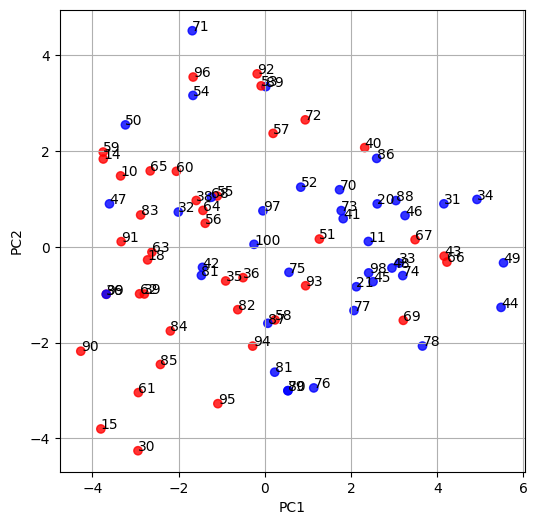

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=gender_colors)
# for x, y, m in zip(pca_row[:, 0], pca_row[:, 1], gender_marker):
#     plt.scatter(x, y, marker=m, c="blue")
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

f0のみ

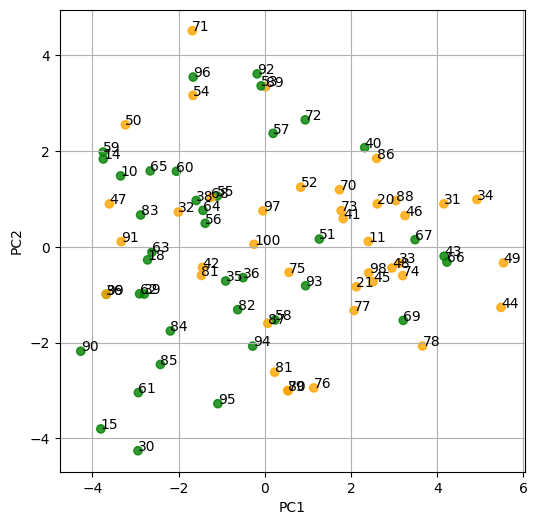

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=f0_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

性別，f0考慮

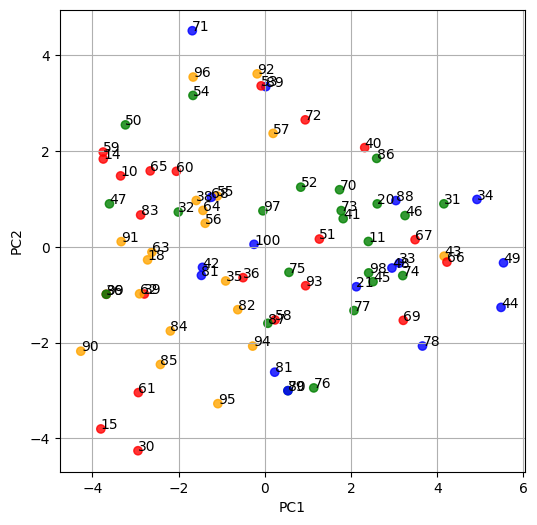

In [ ]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=gender_f0_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()


話速のみ

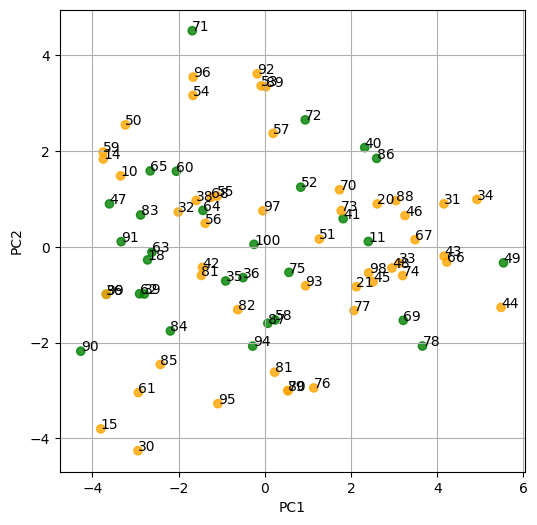

In [ ]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=dur_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()


---

In [ ]:
df['pca1'] = pca_row[:,0]
df['pca2'] = pca_row[:,1]


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.loc[:,['id','text','pca1']].sort_values('pca1').to_string(index=False))


 id                  text      pca1
 90        クールでか細い声の女子中学生 -4.269956
 15            20歳程度のお姉さん -3.804416
 59            キリッとした声の女性 -3.749970
 14           少年ぽさを感じる女の子 -3.747852
 99           早口な爽やかイケボ男子 -3.678342
 36       間をおいて話す明るい女子中学生 -3.678342
 47           70代近いおじいちゃん -3.604897
 10      おとなしく幼さを感じる女子中学生 -3.346149
 91       テンションの低い気だるげな女性 -3.332621
 50        丁寧に話す声の低めのおじさん -3.234586
 30      ゆっくりと活舌悪くこもり声の女性 -2.942814
 61              元気そうな女の子 -2.934131
 62              少し声の低い女性 -2.906087
 83              声の高い成人女性 -2.881428
 39            少し声の高い若い女性 -2.794941
 18         ゆっくり間を開けて話す女性 -2.719854
 65  40～50歳ぐらいの感情豊かなおばちゃん -2.659092
 63       きっちりした話し方の女子高校生 -2.619697
 85            少し声の高い成人女性 -2.422730
 84       キリッとした真面目そうな女の子 -2.191856
 60          女子高校生ぐらいの若い声 -2.051988
 32              少し声の高い男性 -2.007379
 71        マイペースで渋い声なおじさん -1.683357
 54     イントネーションが独特な陽気な男性 -1.667513
 96             高く細い声の女の人 -1.663272
 38                中音程な女性 -1.591528
 81            ボーイッシュな女の子 -1

In [ ]:
print(df.loc[:,['id','text','pca2']].sort_values('pca2').to_string(index=False))


 id                  text      pca2
 30      ゆっくりと活舌悪くこもり声の女性 -4.255590
 15            20歳程度のお姉さん -3.801110
 95          20～30歳ぐらいの女性 -3.273796
 61              元気そうな女の子 -3.042879
 80       人気のありそうな若い陽キャ男子 -3.002969
 79             冴えない軽そうな男 -3.002969
 76              爽やかなおじさん -2.945445
 81          真面目そうな若手社員男性 -2.616959
 85            少し声の高い成人女性 -2.455921
 90        クールでか細い声の女子中学生 -2.179283
 94             優しい声の女子学生 -2.072960
 78       クールで少し落ち着いたお兄さん -2.071414
 84       キリッとした真面目そうな女の子 -1.756783
 87           ちょっと声の高い好青年 -1.597234
 69            優しそうな熟年女上司 -1.535779
 58     おっとりとした声の高いおばあちゃん -1.526885
 77             優しそうなお兄さん -1.331505
 82            しっかりしたお姉さん -1.313061
 44          中音程なやさしそうな男性 -1.265476
 36       間をおいて話す明るい女子中学生 -0.991308
 99           早口な爽やかイケボ男子 -0.991308
 39            少し声の高い若い女性 -0.986014
 62              少し声の低い女性 -0.982396
 21     ゆっくり淡々と話す40代のおじさん -0.834543
 93            セクシーな大人の女性 -0.813664
 45           少し声の低い明るい男性 -0.729358
 35     まったりと話す優しそうな40代女性 -0

### ベクトル数値分析（仮）

In [ ]:
arr = np.array(vector)
max = np.max(arr)
min = np.min(arr)

print(f"max: {max}")
print(f"min: {min}")


max: 201.41806
min: -191.26775


---

### t-SNE

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
vectors = df["vector"].tolist()
vectors = np.array(vectors)
tsne = TSNE(n_components=2)
tsne_xvector = tsne.fit_transform(vectors)

df['tsne_x'] = tsne_xvector[:,0]
df['tsne_y'] = tsne_xvector[:,1]

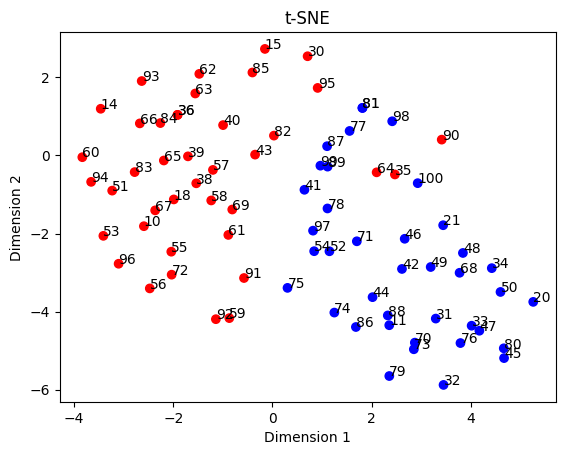

In [ ]:
# 埋め込みをプロットする
plt.scatter(tsne_xvector[:, 0], tsne_xvector[:, 1],c=gender_colors)

annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()


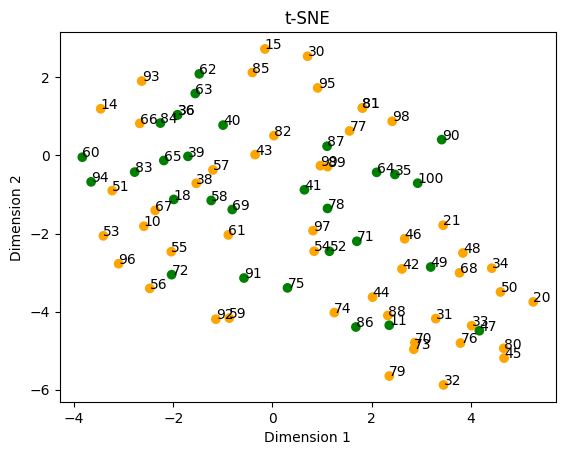

In [ ]:
# 埋め込みをプロットする
plt.scatter(tsne_xvector[:, 0], tsne_xvector[:, 1],c=dur_colors)

annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()

---

## speaker_similarity 比較
https://sython.org/papers/SIG-SLP/takamichi1910slp_jvs.pdf

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
df_corpus_sim_f = pd.read_csv("/autofs/diamond2/share/corpus/JVS/jvs_ver1/speaker_similarity_female.csv")
df_corpus_sim_m = pd.read_csv("/autofs/diamond2/share/corpus/JVS/jvs_ver1/speaker_similarity_male.csv")

In [ ]:
corpus_sim_f = df_corpus_sim_f.iloc[:,1:].values
corpus_sim_f.shape

(50, 51)

<Axes: >

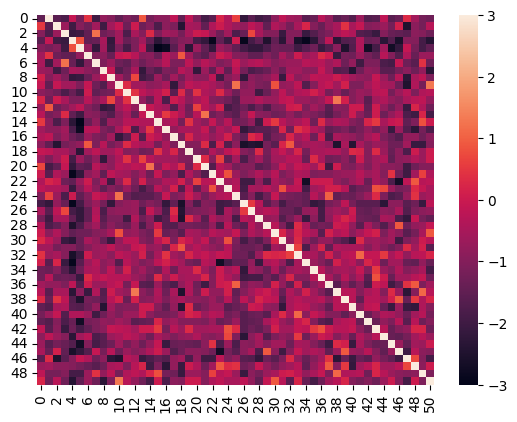

In [ ]:
plt.figure()
sns.heatmap(corpus_sim_f)
# plt.savefig('data/dst/seaborn_heatmap_ndarray.png')